1. Preprocess all the Data we have in DonorsChoose Dataset use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use 'auc' as a metric. check this for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: cs231n class notes, cs231n class video. 
7. For all the model's use TensorBoard and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.


In [75]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/
%cd Colab\ Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks


In [76]:
#%mkdir  /content/drive/My\ Drive/Colab\ Notebooks/Donors
%cd /content/drive/My\ Drive/Colab\ Notebooks/Donors

/content/drive/My Drive/Colab Notebooks/Donors


In [77]:
#!wget --header="Host: doc-14-bo-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_6qogt9obod4dpuoncgstk2bmr9i9petp_nonce=9e2l0h18p8s7k" --header="Connection: keep-alive" "https://doc-14-bo-docs.googleusercontent.com/docs/securesc/dqatjepemrrqj9gto5ii5mu1srbggee7/ll7tavmvpgmfdl9pk0l6c6lufmoffs8i/1600564350000/00484516897554883881/02755040458660561297/1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-?e=download&authuser=0&nonce=9e2l0h18p8s7k&user=02755040458660561297&hash=pvuh2mim8un6ml81rc0det8c7f9ii6lb" -c -O 'preprocessed_data.csv'

In [78]:
#!wget --header="Host: doc-00-bo-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_6qogt9obod4dpuoncgstk2bmr9i9petp=02755040458660561297|1600564350000|ess2t8tqrk66fqbdeut6s8j9j37cptfk" --header="Connection: keep-alive" "https://doc-00-bo-docs.googleusercontent.com/docs/securesc/dqatjepemrrqj9gto5ii5mu1srbggee7/fejfl1hq8f3n015rpr7lkouqmqug3sn7/1600564425000/00484516897554883881/02755040458660561297/1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_?e=download&authuser=0" -c -O 'glove_vectors'

In [79]:
import pandas as pd
import numpy as np
df = pd.read_csv("preprocessed_data.csv")
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [80]:
Y=df["project_is_approved"].values
X=df.drop("project_is_approved",axis = 1) 
X.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)



print(X_train.shape)
print(X_test.shape)
print(X.head())
print(type(X))

(81936, 8)
(27312, 8)
  school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>


MODEL_1

In [82]:
## References
## https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/",
## https://keras.io/getting-started/functional-api-guide
##
from keras.preprocessing.text import Tokenizer

x_train_essay_text = X_train.essay.values.tolist()
x_test_essay_text = X_test.essay.values.tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_essay_text)
vocab_size = len(tokenizer.word_index) + 1
print(len(tokenizer.word_index))


50303


In [83]:
import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())


from numpy import zeros
max_vocabulary = len(tokenizer.word_index)

# create a weight matrix for words in training docs
embedding_matrix = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  
  
  if word in glove_words:
    
    
    embedding_vector = glove[word]
    embedding_matrix[i] = embedding_vector

In [84]:
print(max_vocabulary)

50303


In [85]:
from keras.preprocessing import sequence

encoded_docs = tokenizer.texts_to_sequences(x_train_essay_text)

# padding
max_length = len(max(x_train_essay_text, key=len).split(' '))

x_train_text = sequence.pad_sequences(encoded_docs, maxlen = max_length, padding='post')


In [86]:
print(max_length)

print(x_train_text.shape)

encoded_docs = tokenizer.texts_to_sequences(x_test_essay_text)
x_test_text = sequence.pad_sequences(encoded_docs, maxlen = max_length, padding='post')
x_test_text.shape

324
(81936, 324)


(27312, 324)

In [87]:
x_test_text[:3]

array([[  564,   313,    53,  2249,   434,   473,    48,    78,  8888,
         1934,    53,  3140,   366,   357,  6142,    47,  8888,    22,
          110,   517,   131,  1028,  2969,   131,   858,   881,  9103,
         2701,   235,   130,  1050,   581,  2030,   931,   430,  9103,
         2701,  4607,  8888,    47,    22,  2088,   140,  1306,  5619,
          138,  1793,   283,   749,   106,    29,   336,  8888,  6523,
          138,   354,   768,   106,  1287,  1094,    29,  3112,  7983,
          334,   110,   517,   297,   283,   323,    22,  2336,   140,
          161,  1067,    94,     7,   916,     3,   549,   543,  9936,
          217,  2627,     3,   515,   153,     1,   348,   152,   157,
          338,   903,   434,   640,   136,   744,  3975,   924,  3558,
        29178,    49,  2786,    70,    27,   479,   250,  2341,   179,
         2249,    25,     1,   207,    74,   886, 10611,  8888,     9,
         1931,   501,   162,  2497,  9668,  2043,  8037,  8529,   243,
      

In [88]:
train_sch_state = X_train.school_state.values.tolist()
test_sch_state = X_test.school_state.values.tolist()


tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sch_state)
train_sch_state = tokenizer.texts_to_sequences(train_sch_state)
test_sch_state = tokenizer.texts_to_sequences(test_sch_state)

# Train data
max_length = len(max(train_sch_state, key=len))
x_train_sch_state = sequence.pad_sequences(train_sch_state, maxlen = max_length, padding='post')
x_train_sch_state.shape


# Test data
x_test_sch_state = sequence.pad_sequences(test_sch_state, maxlen = max_length, padding='post')
x_test_sch_state.shape

(27312, 1)

In [89]:
print(x_test_sch_state[:5])

[[47]
 [ 9]
 [14]
 [45]
 [39]]


In [90]:
X_train['project_grade_category'] = X_train['project_grade_category'].str.replace('_','')
X_test['project_grade_category'] = X_test['project_grade_category'].str.replace('_','')
# max_length = 1 #len(max(train_proj_grade))

train_proj_grade = X_train.project_grade_category.values.tolist()
test_proj_grade = X_test.project_grade_category.values.tolist()
max_length = 1 #len(max(train_proj_grade))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_proj_grade)
train_proj_grade = tokenizer.texts_to_sequences(train_proj_grade)
test_proj_grade = tokenizer.texts_to_sequences(test_proj_grade)

x_train_proj_grade = sequence.pad_sequences(train_proj_grade, maxlen = max_length, padding='post')
x_train_proj_grade.shape
x_test_proj_grade = sequence.pad_sequences(test_proj_grade, maxlen = max_length, padding='post')
x_test_proj_grade.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(27312, 1)

In [91]:
train_clean_cat = X_train.clean_categories.values.tolist()
test_clean_cat = X_test.clean_categories.values.tolist()
# max_length = len(max(train_clean_cat, key=len).split(' '))
max_length = 1

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_clean_cat)
train_clean_cat = tokenizer.texts_to_sequences(train_clean_cat)
test_clean_cat = tokenizer.texts_to_sequences(test_clean_cat)

# Train data
x_train_clean_cat = sequence.pad_sequences(train_clean_cat, maxlen = max_length, padding='post')
x_train_clean_cat.shape
# Test data
x_test_clean_cat = sequence.pad_sequences(test_clean_cat, maxlen = max_length, padding='post')
x_test_clean_cat.shape

(27312, 1)

In [92]:
train_clean_sub_cat = X_train.clean_subcategories.values.tolist()
test_clean_sub_cat = X_test.clean_subcategories.values.tolist()
max_length = 1#len(max(train_clean_sub_cat, key=len).split(' '))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_clean_sub_cat)
train_clean_sub_cat = tokenizer.texts_to_sequences(train_clean_sub_cat)
test_clean_sub_cat = tokenizer.texts_to_sequences(test_clean_sub_cat)
# Train data
x_train_clean_sub_cat = sequence.pad_sequences(train_clean_sub_cat, maxlen = max_length, padding='post')
x_train_clean_sub_cat.shape
# Test data
x_test_clean_sub_cat = sequence.pad_sequences(test_clean_sub_cat, maxlen = max_length, padding='post')
x_test_clean_sub_cat.shape

(27312, 1)

In [93]:

train_teacher_prefix = X_train.teacher_prefix.values.tolist()
test_teacher_prefix = X_test.teacher_prefix.values.tolist()
max_length = 1

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_teacher_prefix)
train_teacher_prefix = tokenizer.texts_to_sequences(train_teacher_prefix)
test_teacher_prefix = tokenizer.texts_to_sequences(test_teacher_prefix)

x_train_teacher_prefix = sequence.pad_sequences(train_teacher_prefix, maxlen = max_length, padding='post')
x_train_teacher_prefix.shape
 
# Train data
x_test_teacher_prefix = sequence.pad_sequences(test_teacher_prefix, maxlen = max_length, padding='post')
x_test_teacher_prefix.shape

(27312, 1)

In [94]:
x_train_previously_posted_projects = X_train['teacher_number_of_previously_posted_projects']#train_df.teacher_number_of_previously_posted_projects.values
#x_train_previously_posted_projects = x_train_previously_posted_projects.reshape(76473, 1)
#x_train_previously_posted_projects.shape

x_test_previously_posted_projects = X_test['teacher_number_of_previously_posted_projects']#test_df.teacher_number_of_previously_posted_projects.values
#x_test_previously_posted_projects = x_test_previously_posted_projects.reshape(32775, 1)
#x_test_previously_posted_projects.shape

In [95]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
  try:
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
  
  except ValueError:
    pass

In [96]:
#input 1
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.initializers import he_normal
# fix random seed for reproducibility
from keras.models import load_model
from sklearn.model_selection import train_test_split
np.random.seed(7)
from keras.preprocessing.text import Tokenizer
from scipy.sparse import hstack
from datetime import time
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf

input_1 = Input(shape=(324,))
x1 =Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=x_train_text.shape[1], trainable=False)(input_1)
x1 = Dropout(0.5)(x1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#input 2
input_2 = Input(shape=(1,))
x2 = Embedding(input_dim= 52, output_dim= 2)(input_2)
x2 = Flatten()(x2)

#input 3
input_3 = Input(shape=(1,))
x3 = Embedding(input_dim = 5, output_dim= 2)(input_3)
x3 = Flatten()(x3)

#input 4
input_4 = Input(shape=(1,))
x4 = Embedding(input_dim=52,output_dim= 2)(input_4)
x4 = Flatten()(x4)

#input 5
input_5 = Input(shape=(1,))
x5 = Embedding(input_dim= 396, output_dim= 64)(input_5)
x5 = Flatten()(x5)

#input 6
input_6 = Input(shape=(1,))
x6 = Embedding(input_dim= 6,output_dim= 4)(input_6)
x6 = Flatten()(x6)

#input 7
input_7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input_7)

#merging all the inputs 
concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(128, activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# model with all the inputs
model = Model([input_1, input_2, input_3, input_4, input_5, input_6, input_7], output)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0006,decay = 1e-4), metrics=[auroc])
print(model.summary())

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 324)]        0                                            
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 324, 300)     15091200    input_29[0][0]                   
__________________________________________________________________________________________________
dropout_15 (Dropout)            (None, 324, 300)     0           embedding_24[0][0]               
__________________________________________________________________________________________________
input_30 (InputLayer)           [(None, 1)]          0                                            
_______________________________________________________________________________________

In [24]:
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical
from keras.models import load_model
from datetime import time


y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)


x_train =  [x_train_text, x_train_sch_state, x_train_proj_grade, x_train_clean_cat, x_train_clean_sub_cat, x_train_teacher_prefix, x_train_previously_posted_projects]
x_test = [x_test_text, x_test_sch_state, x_test_proj_grade, x_test_clean_cat, x_test_clean_sub_cat, x_test_teacher_prefix, x_test_previously_posted_projects]

filepath = "weight_model1.h5"
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,tensorboard]
#model.fit(x_train, y_train, epochs=20,verbose=1,batch_size=128, callbacks =callbacks_list)
model.fit(x_train, y_train, epochs=7,verbose=1,batch_size=128, callbacks =callbacks_list,validation_data=(x_test,y_test))

# model.save('dc_model1.h5')
# https://github.com/keras-team/keras/issues/10104
dependencies = {
    'auroc': auroc
}
#model = load_model("dc_model2.h5", custom_objects=dependencies)

Epoch 1/7
  1/641 [..............................] - ETA: 4s - loss: 1.7783 - auroc: 0.4682WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
641/641 [==============================] - 36s 57ms/step - loss: 0.5866 - auroc: 0.5197 - val_loss: 0.4690 - val_auroc: 0.5769
Epoch 2/7
641/641 [==============================] - 33s 52ms/step - loss: 0.4785 - auroc: 0.5314 - val_loss: 0.4580 - val_auroc: 0.6186
Epoch 3/7
641/641 [==============================] - 33s 52ms/step - loss: 0.4517 - auroc: 0.5924 - val_loss: 0.5152 - val_auroc: 0.6555
Epoch 4/7
641/641 [==============================] - 33s 52ms/step - loss: 0.4313 - auroc: 0.6623 - val_loss: 0.4224 - val_auroc: 0.7255
Epoch 5/7
641/641 [==============================] - 33s 52ms/step - loss: 0.4148 - auroc: 0.

In [25]:
model.fit(x_train, y_train, epochs=5,verbose=1,batch_size=128, callbacks =callbacks_list,validation_data=(x_test,y_test))

Epoch 1/5
641/641 [==============================] - 34s 53ms/step - loss: 0.3934 - auroc: 0.7409 - val_loss: 0.3859 - val_auroc: 0.7544
Epoch 2/5
641/641 [==============================] - 33s 52ms/step - loss: 0.3900 - auroc: 0.7429 - val_loss: 0.3812 - val_auroc: 0.7540
Epoch 3/5
641/641 [==============================] - 33s 52ms/step - loss: 0.3859 - auroc: 0.7499 - val_loss: 0.3848 - val_auroc: 0.7581
Epoch 4/5
641/641 [==============================] - 33s 52ms/step - loss: 0.3832 - auroc: 0.7585 - val_loss: 0.3833 - val_auroc: 0.7585
Epoch 5/5
641/641 [==============================] - 33s 52ms/step - loss: 0.3825 - auroc: 0.7632 - val_loss: 0.3829 - val_auroc: 0.7591


MODEL_2 - Based on TF/IDF

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


x_train_essay_text = X_train.essay.values.tolist()
x_test_essay_text = X_test.essay.values.tolist()

tfvectorizer = TfidfVectorizer(min_df=10, max_features=10000)
tfvectorizer.fit(x_train_essay_text) 
x_train_tfidf  = tfvectorizer.transform(x_train_essay_text)



Text(0, 0.5, 'IDF Value')

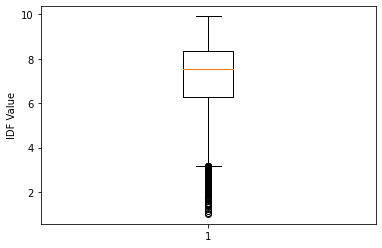

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
#Train the LSTM after removing the Low and High idf value words.  
# box plot to decide the threshold
features = tfvectorizer.get_feature_names()
#print(features)
idf_val = tfvectorizer.idf_

feature_idf_pair = dict(zip(features, idf_val))

#print(feature_idf_pair)
plt.boxplot(tfvectorizer.idf_)
plt.ylabel("IDF Value")

In [24]:
## Evaluating the threshold, since the requirement is to drop the min and the max freq features in essay
min_threshold = np.percentile(tfvectorizer.idf_, 10)
max_threshold = np.percentile(tfvectorizer.idf_, 90)
print(min_threshold, max_threshold)

##  Overriding the Threshold as suggested
min_threshold=2
max_threshold=10.5

4.95991960787357 8.787345413659224


In [25]:
print(len(feature_idf_pair))
for k  in list(feature_idf_pair.keys()):
    # removing low and high idf features
    if (min_threshold >= feature_idf_pair[k]) or (feature_idf_pair[k] >= max_threshold):
        feature_idf_pair.pop(k)

len(feature_idf_pair)

10000


9975

In [26]:
## Removing the words with high and low frequency
from tqdm import tqdm
x_train_essay_text_filtered=[]
x_test_essay_text_filtered=[]

for text in tqdm(x_train_essay_text):
  #print(text)
  result=""
  for word in text.split(): 
    #print(word)
    #print("\n")
    if word.lower() in list(feature_idf_pair.keys()):
        
        result = result+" "+word
      
        
  x_train_essay_text_filtered.append(result)
  

100%|██████████| 81936/81936 [31:46<00:00, 42.98it/s]


In [27]:
x_test_essay_text_filtered=[]

for text in tqdm(x_test_essay_text):
  #print(text)
  result=""
  for word in text.split(): 
    #print(word)
    #print("\n")
    if word.lower() in list(feature_idf_pair.keys()):
        
        result = result+" "+word
      
        
    if word.lower() in list(feature_idf_pair.keys()):
        
        result = result+" "+word
      
        

  
  x_test_essay_text_filtered.append(result)

  

100%|██████████| 27312/27312 [21:01<00:00, 21.65it/s]


In [28]:
len(x_train_essay_text_filtered)

81936

In [29]:
import pickle

fp= open("x_train_tfidf_filter.pkl", 'wb')
pickle.dump(x_train_essay_text_filtered, fp, protocol=pickle.HIGHEST_PROTOCOL)
 

fp= open("x_train_tfidf_filter.pkl", 'wb')
pickle.dump(x_test_essay_text_filtered, fp, protocol=pickle.HIGHEST_PROTOCOL)


In [30]:
# tokenizing 
t = Tokenizer()
t.fit_on_texts(x_train_essay_text_filtered)
vocab_size = len(t.word_index) + 1
print(len(t.word_index))

9975


In [31]:
max_length = len(max(x_train_essay_text_filtered, key=len).split(' '))
print(max_length)

264


In [32]:

X_train_encoded_docs = t.texts_to_sequences(x_train_essay_text_filtered)
X_test_encoded_docs = t.texts_to_sequences(x_test_essay_text_filtered)
print(type(X_train_encoded_docs))
X_train_padded_docs = sequence.pad_sequences(X_train_encoded_docs, maxlen=max_length, padding='post')
X_test_padded_docs = sequence.pad_sequences(X_test_encoded_docs, maxlen=max_length, padding='post')


## Load the Glove file

import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())


from numpy import zeros
max_vocabulary = len(t.word_index)
# create a weight matrix for words in training docs
embedding_matrix2 = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  
  
  if word in glove_words:
    
    
    embedding_vector = glove[word]
    embedding_matrix2[i] = embedding_vector
where_are_NaNs = np.isnan(embedding_matrix2)
embedding_matrix2[where_are_NaNs] = 0

<class 'list'>


In [34]:
#input 1
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.preprocessing import sequence
from keras.initializers import he_normal
# fix random seed for reproducibility
from keras.models import load_model
from sklearn.model_selection import train_test_split
np.random.seed(7)
from keras.preprocessing.text import Tokenizer
from scipy.sparse import hstack
from datetime import time
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
print(X_train_padded_docs.shape)
print(X_test_padded_docs.shape)
print(embedding_matrix2.shape)

(81936, 264)
(27312, 264)
(9976, 300)


In [42]:
input_1 = Input(shape=(264,))
x1 =Embedding(vocab_size, 300, weights=[embedding_matrix2], input_length=300, trainable=False)(input_1)
x1 = Dropout(0.5)(x1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#input 2
input_2 = Input(shape=(1,))
x2 = Embedding(input_dim= 52, output_dim= 26)(input_2)
x2 = Flatten()(x2)

#input 3
input_3 = Input(shape=(1,))
x3 = Embedding(input_dim = 5, output_dim= 3)(input_3)
x3 = Flatten()(x3)

#input 4
input_4 = Input(shape=(1,))
x4 = Embedding(input_dim=52,output_dim= 25)(input_4)
x4 = Flatten()(x4)

#input 5
input_5 = Input(shape=(1,))
x5 = Embedding(input_dim= 396, output_dim= 64)(input_5)
x5 = Flatten()(x5)

#input 6
input_6 = Input(shape=(1,))
x6 = Embedding(input_dim= 6,output_dim= 4)(input_6)
x6 = Flatten()(x6)

#input 7
input_7 = Input(shape=(1,))
x7 = Dense(16,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input_7)

#merging all the inputs 
concat = concatenate([x1,x2,x3,x4,x5,x6,x7])
#x = BatchNormalization()(concat)

x = Dense(100, activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.001))(concat)
x = Dropout(0.5)(x)
x = Dense(200,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(80,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# model with all the inputs
model = Model([input_1, input_2, input_3, input_4, input_5, input_6, input_7], output)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0006,decay = 1e-4), metrics=[auroc])
print(model.summary())


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 264)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 264, 300)     2992800     input_15[0][0]                   
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 264, 300)     0           embedding_12[0][0]               
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
_______________________________________________________________________________________

In [43]:
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical
from keras.models import load_model
from datetime import time


y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
 

x_train =  [X_train_padded_docs, x_train_sch_state, x_train_proj_grade, x_train_clean_cat, x_train_clean_sub_cat, x_train_teacher_prefix, x_train_previously_posted_projects]
x_test = [X_test_padded_docs, x_test_sch_state, x_test_proj_grade, x_test_clean_cat, x_test_clean_sub_cat, x_test_teacher_prefix, x_test_previously_posted_projects]

filepath = "weight_model1.h5"
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,tensorboard]
#model.fit(x_train, y_train, epochs=20,verbose=1,batch_size=128, callbacks =callbacks_list)
print(type(y_train), type(y_test))
print(x_train[:1])
model.fit(x_train, y_train, epochs=7,verbose=1,batch_size=512, callbacks =callbacks_list,validation_data=(x_test,y_test))

# model.save('dc_model1.h5')
# https://github.com/keras-team/keras/issues/10104
dependencies = {
    'auroc': auroc
}
#model = load_model("dc_model2.h5", custom_objects=dependencies)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[array([[ 121, 2537,  116, ...,    0,    0,    0],
       [  99,   50,  409, ...,    0,    0,    0],
       [ 839,  136, 4150, ...,    0,    0,    0],
       ...,
       [  80,   50,   65, ...,    0,    0,    0],
       [  23,  697,   79, ...,    0,    0,    0],
       [ 582,   28,  144, ...,    0,    0,    0]], dtype=int32)]
Epoch 1/7
161/161 [==============================] - 22s 137ms/step - loss: 0.7133 - auroc: 0.5187 - val_loss: 0.5295 - val_auroc: 0.4913
Epoch 2/7
161/161 [==============================] - 21s 133ms/step - loss: 0.5282 - auroc: 0.5062 - val_loss: 0.5100 - val_auroc: 0.4999
Epoch 3/7
161/161 [==============================] - 21s 132ms/step - loss: 0.4953 - auroc: 0.5000 - val_loss: 0.4845 - val_auroc: 0.5140
Epoch 4/7
161/161 [==============================] - 21s 133ms/step - loss: 0.5467 - auroc: 0.5000 - val_loss: 0.5142 - val_auroc: 0.4409
Epoch 5/7
161/161 [==============================] - 22s 134ms/step - lo

In [ ]:
#model.fit(x_train, y_train, epochs=10,verbose=1,batch_size=128, callbacks =callbacks_list,validation_data=(x_test,y_test))

In [45]:
model.fit(x_train, y_train, epochs=7,verbose=1,batch_size=256, callbacks =callbacks_list,validation_data=(x_test,y_test))

Epoch 1/7
321/321 [==============================] - 25s 78ms/step - loss: 0.4525 - auroc: 0.5587 - val_loss: 0.4577 - val_auroc: 0.4933
Epoch 2/7
321/321 [==============================] - 25s 78ms/step - loss: 0.4484 - auroc: 0.5676 - val_loss: 0.4593 - val_auroc: 0.5169
Epoch 3/7
321/321 [==============================] - 25s 77ms/step - loss: 0.4459 - auroc: 0.5678 - val_loss: 0.4564 - val_auroc: 0.5257
Epoch 4/7
321/321 [==============================] - 25s 78ms/step - loss: 0.4433 - auroc: 0.5763 - val_loss: 0.4486 - val_auroc: 0.5478
Epoch 5/7
321/321 [==============================] - 25s 78ms/step - loss: 0.4408 - auroc: 0.5748 - val_loss: 0.4462 - val_auroc: 0.5719
Epoch 6/7
321/321 [==============================] - 25s 77ms/step - loss: 0.4393 - auroc: 0.5732 - val_loss: 0.4494 - val_auroc: 0.5539
Epoch 7/7
321/321 [==============================] - 25s 78ms/step - loss: 0.4372 - auroc: 0.5776 - val_loss: 0.4404 - val_auroc: 0.5742


In [98]:
model.fit(x_train, y_train, epochs=7,verbose=1,batch_size=256, callbacks =callbacks_list,validation_data=(x_test,y_test))


Epoch 1/7
641/641 [==============================] - 37s 57ms/step - loss: 0.5855 - auroc: 0.5161 - val_loss: 0.4611 - val_auroc: 0.6148
Epoch 2/7
641/641 [==============================] - 36s 55ms/step - loss: 0.4690 - auroc: 0.5845 - val_loss: 0.4352 - val_auroc: 0.7045
Epoch 3/7
641/641 [==============================] - 36s 55ms/step - loss: 0.4382 - auroc: 0.6743 - val_loss: 0.4126 - val_auroc: 0.7354
Epoch 4/7
641/641 [==============================] - 35s 55ms/step - loss: 0.4190 - auroc: 0.7047 - val_loss: 0.3973 - val_auroc: 0.7486
Epoch 5/7
641/641 [==============================] - 36s 56ms/step - loss: 0.4095 - auroc: 0.7169 - val_loss: 0.3958 - val_auroc: 0.7531
Epoch 6/7
641/641 [==============================] - 36s 56ms/step - loss: 0.4040 - auroc: 0.7249 - val_loss: 0.3875 - val_auroc: 0.7611
Epoch 7/7
641/641 [==============================] - 36s 56ms/step - loss: 0.3968 - auroc: 0.7380 - val_loss: 0.3817 - val_auroc: 0.7622


In [99]:
model.fit(x_train, y_train, epochs=5,verbose=1,batch_size=256, callbacks =callbacks_list,validation_data=(x_test,y_test))

Epoch 1/5
321/321 [==============================] - 32s 99ms/step - loss: 0.3892 - auroc: 0.7494 - val_loss: 0.4014 - val_auroc: 0.7330
Epoch 2/5
321/321 [==============================] - 31s 98ms/step - loss: 0.3855 - auroc: 0.7610 - val_loss: 0.3846 - val_auroc: 0.7589
Epoch 3/5
321/321 [==============================] - 31s 97ms/step - loss: 0.3827 - auroc: 0.7698 - val_loss: 0.3884 - val_auroc: 0.7622
Epoch 4/5
321/321 [==============================] - 31s 98ms/step - loss: 0.3764 - auroc: 0.7869 - val_loss: 0.4018 - val_auroc: 0.7607
Epoch 5/5
321/321 [==============================] - 31s 97ms/step - loss: 0.3702 - auroc: 0.8004 - val_loss: 0.3944 - val_auroc: 0.7512


MODEL_3

Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors (using CountVectorizer)

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
# http://flovv.github.io/Embeddings_with_keras_part2/
# school state
token = CountVectorizer()
# integer encode the documents
train_sch_state = X_train.school_state.values.tolist()
test_sch_state = X_test.school_state.values.tolist()
x_train_sch_state = token.fit_transform(train_sch_state)
x_test_sch_state = token.transform(test_sch_state)
print(x_train_sch_state.shape, x_test_sch_state.shape)

(81936, 51) (27312, 51)


In [158]:
# proj_grade
token = CountVectorizer()
# integer encode the documents
train_proj_grade = X_train.project_grade_category.values.tolist()
test_proj_grade = X_test.project_grade_category.values.tolist()
x_train_proj_grade = token.fit_transform(train_proj_grade)
x_test_proj_grade = token.transform(test_proj_grade)
print(x_train_proj_grade.shape, x_test_proj_grade.shape)

(81936, 4) (27312, 4)


In [159]:
# clean_cat
token = CountVectorizer()
# integer encode the documents
train_clean_cat = X_train.clean_categories.values.tolist()
test_clean_cat = X_test.clean_categories.values.tolist()


x_train_clean_cat = token.fit_transform(train_clean_cat)
x_test_clean_cat = token.transform(test_clean_cat)
print(x_train_clean_cat.shape, x_test_clean_cat.shape)

(81936, 9) (27312, 9)


In [160]:

# x_train_clean_sub_cat
token = CountVectorizer()
# integer encode the documents
train_clean_sub_cat = X_train.clean_subcategories.values.tolist()
test_clean_sub_cat = X_test.clean_subcategories.values.tolist()

x_train_clean_sub_cat = token.fit_transform(train_clean_sub_cat)
x_test_clean_sub_cat = token.transform(test_clean_sub_cat)

print(x_train_clean_sub_cat.shape, x_test_clean_sub_cat.shape)

(81936, 30) (27312, 30)


In [161]:
# x_train_teacher_prefix
token = CountVectorizer()
# integer encode the documents

train_teacher_prefix = X_train.teacher_prefix.values.tolist()
test_teacher_prefix = X_test.teacher_prefix.values.tolist()

x_train_teacher_prefix = token.fit_transform(train_teacher_prefix)
x_test_teacher_prefix = token.transform(test_teacher_prefix)
print(x_train_teacher_prefix.shape, x_test_teacher_prefix.shape)

(81936, 5) (27312, 5)


In [162]:

x_train_previously_posted_projects = X_train.teacher_number_of_previously_posted_projects.values
x_train_previously_posted_projects = x_train_previously_posted_projects.reshape(81936, 1)
#x_train_previously_posted_projects.shape
x_test_previously_posted_projects = X_test.teacher_number_of_previously_posted_projects.values
x_test_previously_posted_projects = x_test_previously_posted_projects.reshape(27312, 1)
print(x_train_previously_posted_projects.shape, x_test_previously_posted_projects.shape)

(81936, 1) (27312, 1)


In [163]:

### input_1
x_train_1 =  x_train_text
x_test_1 =  x_test_text

In [164]:
print(embedding_matrix.shape)
print(x_train_1[1].shape)


(50304, 300)
(324,)


In [165]:
### input 2
x_train_2 = hstack((x_train_sch_state, x_train_proj_grade, x_train_clean_cat, x_train_clean_sub_cat, x_train_teacher_prefix, x_train_previously_posted_projects)).todense()
x_train_2 = np.array(x_train_2).reshape(x_train_2.shape[0],x_train_2.shape[1],1)

x_test_2 = hstack((x_test_sch_state, x_test_proj_grade, x_test_clean_cat, x_test_clean_sub_cat, x_test_teacher_prefix, x_test_previously_posted_projects)).todense()
x_test_2 = np.array(x_test_2).reshape(x_test_2.shape[0],x_test_2.shape[1],1)


In [171]:
from keras.layers import concatenate, BatchNormalization
from keras.models import Model
# input 1

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# keras import
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
# from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import concatenate, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical
from keras.models import load_model
from datetime import time
from keras.layers import LSTM, Dropout, Input, Conv1D
input_1 = Input(shape=(324,))
x1 =Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=x_train_text.shape[1], trainable=False)(input_1)
x1 = Dropout(0.3)(x1)
x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

# input 2
input_2 = Input(shape=(100,1))
x2 = Conv1D(filters=128,kernel_size=3, strides=1)(input_2)
x2 = Conv1D(filters=64,kernel_size=3, strides=1)(x2)
x2 = Flatten()(x2)


# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.3)(x)
x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(32,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.6)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with two inputs
model = Model([input_1,input_2], output)
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0006,decay = 1e-4), metrics=[auroc])
print(model.summary())

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_75 (InputLayer)           [(None, 324)]        0                                            
__________________________________________________________________________________________________
embedding_63 (Embedding)        (None, 324, 300)     15091200    input_75[0][0]                   
__________________________________________________________________________________________________
input_76 (InputLayer)           [(None, 100, 1)]     0                                            
__________________________________________________________________________________________________
dropout_40 (Dropout)            (None, 324, 300)     0           embedding_63[0][0]               
______________________________________________________________________________________

In [167]:
from keras.utils import to_categorical 
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [168]:
x1 = [ [2,2],[2,3]]
x2 = [ [1,3],[5,5]]
X3= [x1,x2]
print(X3)

[[[2, 2], [2, 3]], [[1, 3], [5, 5]]]


In [169]:
print(x_train_1.shape)
print(x_train_2.shape)
print(x_test_1.shape)
print(x_test_2.shape)
x_train = [x_train_1, x_train_2]
x_test  = [x_test_1, x_test_2]

(81936, 324)
(81936, 100, 1)
(27312, 324)
(27312, 100, 1)


In [172]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.utils import to_categorical
from keras.models import load_model
from datetime import time 


from keras.layers import Dense, Flatten
from keras.layers import LSTM, Dropout, Input, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import he_normal
# fix random seed for reproducibility
from keras.models import load_model
from sklearn.model_selection import train_test_split
np.random.seed(7)
from keras.preprocessing.text import Tokenizer
from scipy.sparse import hstack

import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
 

filepath = "weight_model3.h5"
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,tensorboard]
#model.fit(x_train, y_train, epochs=20,verbose=1,batch_size=128, callbacks =callbacks_list)
model.fit(x_train, y_train, epochs=7,verbose=1,batch_size=256, callbacks =callbacks_list,validation_data=(x_test,y_test))

Epoch 1/7
321/321 [==============================] - 32s 99ms/step - loss: 0.6384 - auroc: 0.5273 - val_loss: 0.4825 - val_auroc: 0.5778
Epoch 2/7
321/321 [==============================] - 32s 98ms/step - loss: 0.5036 - auroc: 0.5747 - val_loss: 0.4978 - val_auroc: 0.6147
Epoch 3/7
321/321 [==============================] - 31s 98ms/step - loss: 0.4695 - auroc: 0.6239 - val_loss: 0.4395 - val_auroc: 0.6874
Epoch 4/7
321/321 [==============================] - 32s 99ms/step - loss: 0.4454 - auroc: 0.6738 - val_loss: 0.4278 - val_auroc: 0.7172
Epoch 5/7
321/321 [==============================] - 32s 99ms/step - loss: 0.4328 - auroc: 0.6951 - val_loss: 0.4128 - val_auroc: 0.7352
Epoch 6/7
321/321 [==============================] - 32s 100ms/step - loss: 0.4202 - auroc: 0.7145 - val_loss: 0.4159 - val_auroc: 0.7415
Epoch 7/7
321/321 [==============================] - 33s 102ms/step - loss: 0.4127 - auroc: 0.7230 - val_loss: 0.3977 - val_auroc: 0.7522


In [174]:

model.fit(x_train, y_train, epochs=5,verbose=1,batch_size=256, callbacks =callbacks_list,validation_data=(x_test,y_test))

Epoch 1/5
321/321 [==============================] - 33s 103ms/step - loss: 0.4032 - auroc: 0.7384 - val_loss: 0.3930 - val_auroc: 0.7596
Epoch 2/5
321/321 [==============================] - 32s 101ms/step - loss: 0.4020 - auroc: 0.7463 - val_loss: 0.3892 - val_auroc: 0.7648
Epoch 3/5
321/321 [==============================] - 32s 101ms/step - loss: 0.3984 - auroc: 0.7598 - val_loss: 0.3973 - val_auroc: 0.7623
Epoch 4/5
321/321 [==============================] - 33s 101ms/step - loss: 0.3968 - auroc: 0.7711 - val_loss: 0.4028 - val_auroc: 0.7639
Epoch 5/5
321/321 [==============================] - 32s 101ms/step - loss: 0.3962 - auroc: 0.7841 - val_loss: 0.4095 - val_auroc: 0.7601


SUMMARY

In [100]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model", "Train AUC", "Test AUC"]
x.add_row(["Model_1", "0.7632", "0.7591"])
x.add_row(["Model_2", "0.7380", "0.7622"])
x.add_row(["Model_3", "0.7463", "0.7648"])
print(x)

+---------+-----------+----------+
|  Model  | Train AUC | Test AUC |
+---------+-----------+----------+
| Model_1 |   0.7632  |  0.7591  |
| Model_2 |   0.7380  |  0.7622  |
| Model_3 |   0.7463  |  0.7648  |
+---------+-----------+----------+


Model_3 gives the best AUC score on validation data